In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors


In [3]:
df=pd.read_csv("cancer.csv")

In [4]:
df.head(10)

,"diagnosis(1=m, 0=b)",radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [5]:
df.shape

(569, 31)

In [6]:
df.isna().sum()

diagnosis(1=m, 0=b)        0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df=df.dropna(axis=1)

In [8]:
df.shape

(569, 31)

In [10]:
df['diagnosis(1=m, 0=b)'].value_counts()

0    357
1    212
Name: diagnosis(1=m, 0=b), dtype: int64

In [11]:
df.dtypes

diagnosis(1=m, 0=b)          int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

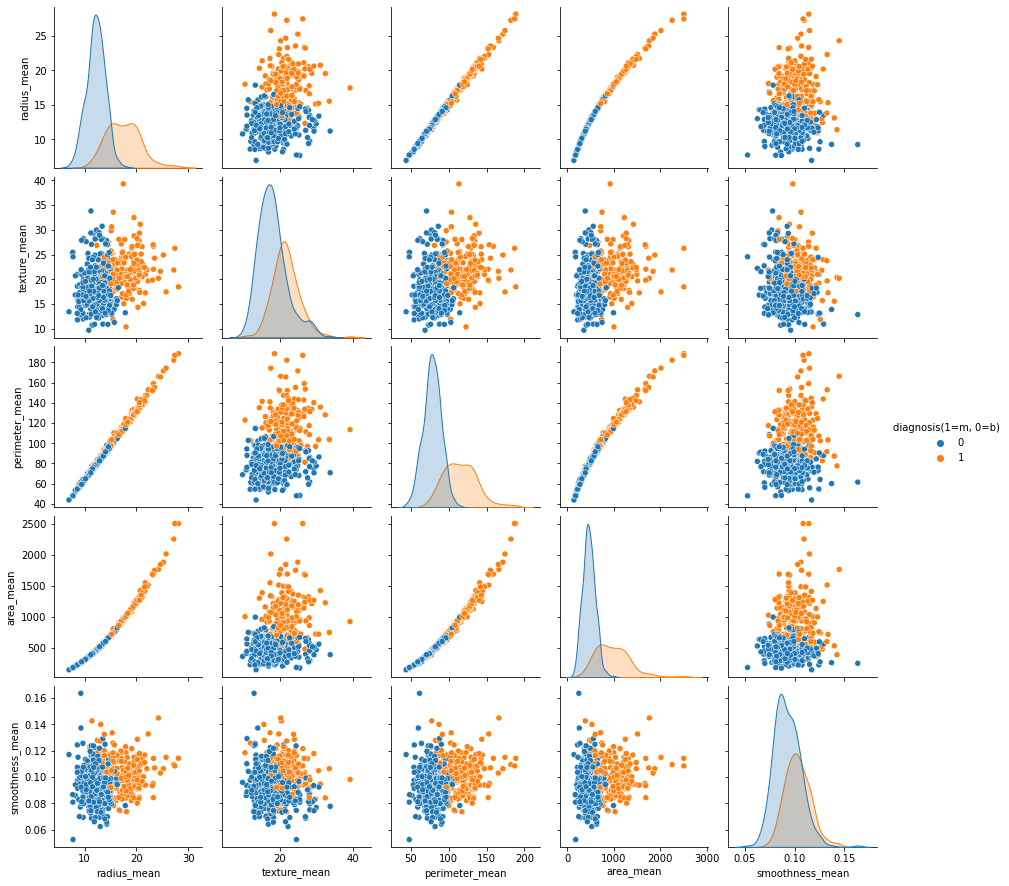

In [16]:
sns.pairplot(df.iloc[:,0:6], hue='diagnosis(1=m, 0=b)')

In [17]:
x=df.iloc[:,1:32].values
y=df.iloc[:,0].values

In [18]:
#split the data 75 percent training and 25 percent testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.25,random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [25]:
knn= neighbors.KNeighborsClassifier()

In [28]:
knn.score(x_test,y_test)

0.951048951048951

In [36]:
no_neighbors = range(1,15)

training_accuracy = []
test_accuracy = []

for n in no_neighbors:
    knn = neighbors.KNeighborsClassifier(n_neighbors= n)
    knn.fit(x_train,y_train)
    training_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

[]

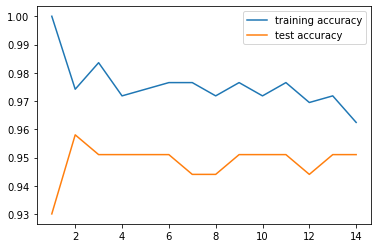

In [40]:
plt.plot(no_neighbors,training_accuracy, label="training accuracy")
plt.plot(no_neighbors,test_accuracy,label="test accuracy")
plt.legend()
plt.plot()


In [47]:

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [44]:
y_pred=knn.predict(x_test)

In [48]:
accuracy= accuracy_score(y_test,y_pred)
con_matrix = confusion_matrix(y_test,y_pred)
classification_report_str = classification_report(y_test,y_pred)

In [50]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", con_matrix)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.951048951048951
Confusion Matrix:
 [[88  2]
 [ 5 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        90
           1       0.96      0.91      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [53]:
new_data_features = {}


feature_names = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
                  "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean",
                  "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se",
                  "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se",
                  "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst",
                  "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst",
                  "symmetry_worst", "fractal_dimension_worst"]


for feature_name in feature_names:
    user_input = float(input(f"Enter the value for {feature_name}: "))
    new_data_features[feature_name] = user_input
new_data = pd.DataFrame([new_data_features])
new_data_scaled = sc.transform(new_data)
prediction = knn.predict(new_data_scaled)
if prediction[0] == 1:
    print("/n/n/n/nThe person is predicted to have breast cancer (Malignant).")
else:
    print("/n/n/n/nThe person is predicted to be cancer-free (Benign).")
    

Enter the value for radius_mean: 15
Enter the value for texture_mean: 18
Enter the value for perimeter_mean: 100
Enter the value for area_mean: 700
Enter the value for smoothness_mean: 0.1
Enter the value for compactness_mean: 0.15
Enter the value for concavity_mean: 0.1
Enter the value for concave_points_mean: 0.05
Enter the value for symmetry_mean: 0.02
Enter the value for fractal_dimension_mean: 0.07
Enter the value for radius_se: 0.5
Enter the value for texture_se: 1.0
Enter the value for perimeter_se: 3
Enter the value for area_se: 40
Enter the value for smoothness_se: 0.01
Enter the value for compactness_se: 0.02
Enter the value for concavity_se: 0.01
Enter the value for concave_points_se: 0.005
Enter the value for symmetry_se: 0.015
Enter the value for fractal_dimension_se: 0.003
Enter the value for radius_worst: 20
Enter the value for texture_worst: 25
Enter the value for perimeter_worst: 130
Enter the value for area_worst: 900
Enter the value for smoothness_worst: 0.12
Enter t

C:\Users\windows\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
